In [ ]:
'''
Yuen Yee Lo
Unit7 Capstone2
House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

'''

In [ ]:
'''
Implement LASSO regression to avoid multicollinearity
Includes linear regression, random forest, and XGBoost models as well

'''

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle # save load models
from datetime import datetime
from collections import Counter
import scipy.stats as st

# utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# import sklearn ML library
# scoring
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [5]:
# data 
p="/Users/yuenyeelo/Documents/Jobs/springboard/projects/Unit7_Capstone2/house_price_prediction/data/"
trainfile=p+"train.csv"
testfile=p+"test.csv"

In [6]:
df=pd.read_csv(trainfile)

In [7]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [8]:
df.columns.tolist()

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [17]:
df['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [16]:
n=df.nunique(axis=0)
print(n)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


In [26]:
df['YrSold'].value_counts() #unique()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [32]:
for y in sorted(df['YrSold'].unique()):
    print(df[df['YrSold'] == y ]['MoSold'].value_counts().sort_index())
    p=df[df['YrSold'] == y]['SalePrice'].mean()
    print(y, p)

1     10
2      9
3     25
4     27
5     38
6     48
7     67
8     23
9     15
10    24
11    16
12    12
Name: MoSold, dtype: int64
2006 182549.4585987261
1     13
2      8
3     23
4     23
5     43
6     59
7     51
8     40
9     11
10    16
11    24
12    18
Name: MoSold, dtype: int64
2007 186063.1519756839
1     13
2     10
3     18
4     26
5     38
6     51
7     49
8     29
9     17
10    22
11    17
12    14
Name: MoSold, dtype: int64
2008 177360.83881578947
1     12
2     10
3     19
4     26
5     37
6     59
7     61
8     30
9     20
10    27
11    22
12    15
Name: MoSold, dtype: int64
2009 179432.10355029587
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: MoSold, dtype: int64
2010 177393.67428571428


In [33]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

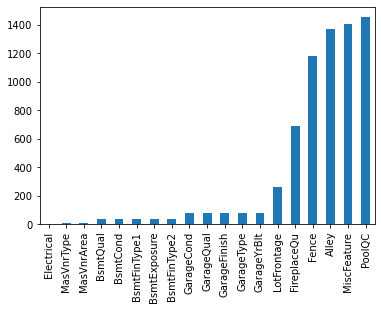

In [34]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


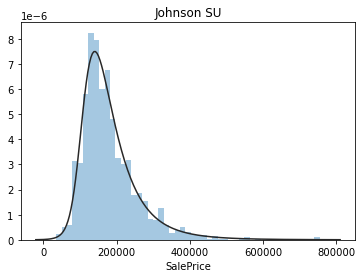

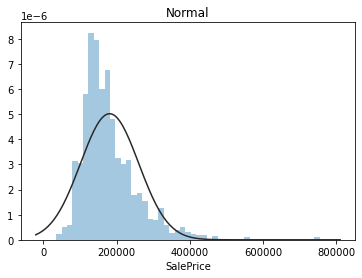

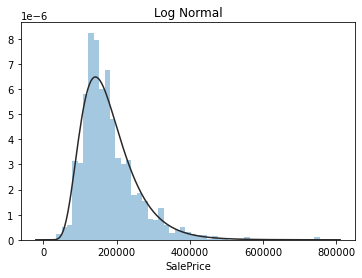

In [36]:
y = df['SalePrice']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/yue

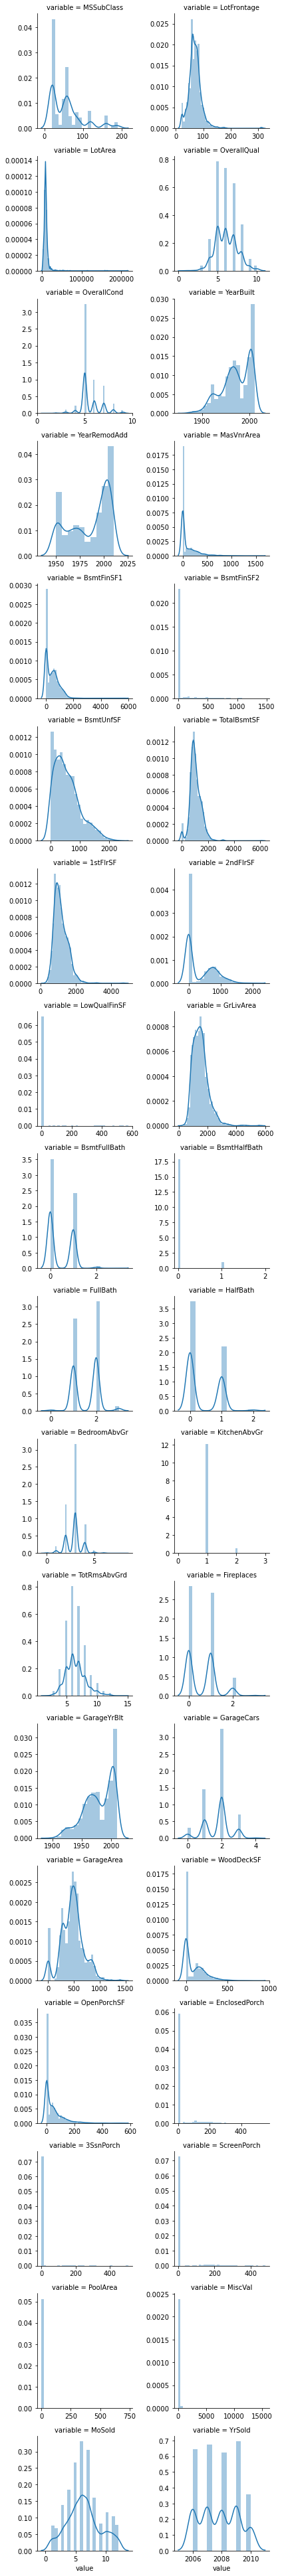

In [38]:
f = pd.melt(df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [ ]:
#Categorical data
#With qualitative variables we can implement two methods. 
#First one is to check distribution of SalePrice with respect to variable values and enumerate them. 
#Second to create dummy variable for each possible category.



/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


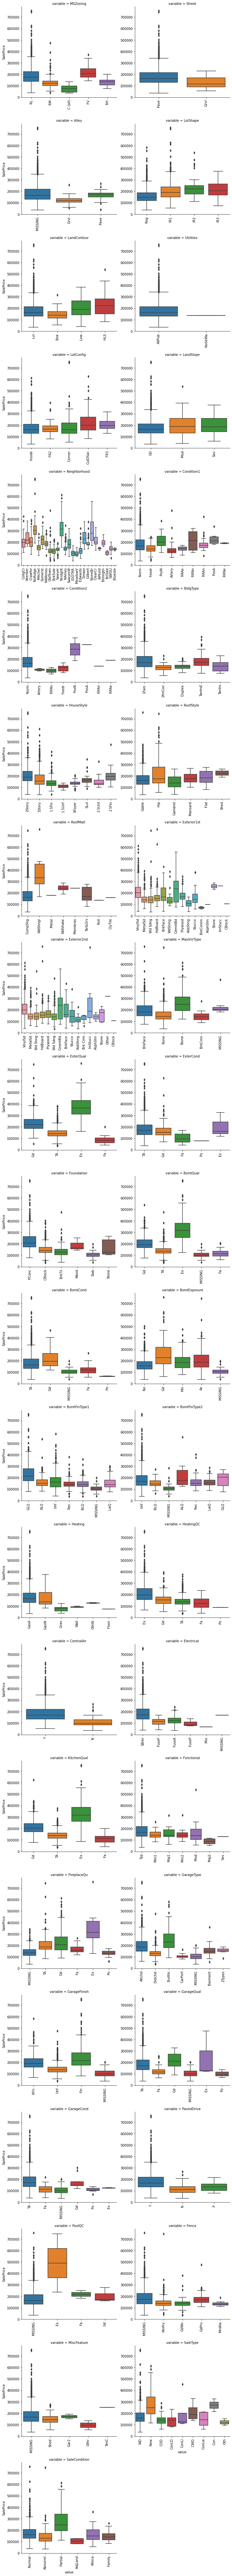

In [39]:
for c in qualitative:
    df[c] = df[c].astype('category')
    if df[c].isnull().any():
        df[c] = df[c].cat.add_categories(['MISSING'])
        df[c] = df[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
    
f = pd.melt(df, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [ ]:
#Some categories seem to more diverse with respect to SalePrice than others. 
#Neighborhood has big impact on house prices. Most expensive seems to be Partial SaleCondition. 
#Having pool on property seems to improve price substantially. 
#There are also differences in variabilities between category values.

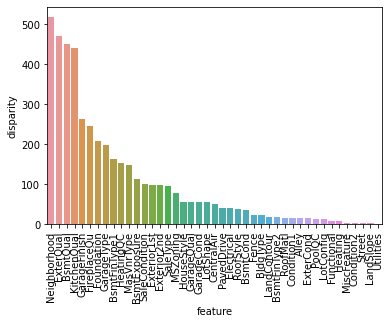

In [42]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]  #spacy.stats.f_oneway
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [43]:
# qualitative variables get encoded according to ordering based on mean of SalePrice.


def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [47]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley  \
0        1          60       RL         65.0     8450   Pave  MISSING   
1        2          20       RL         80.0     9600   Pave  MISSING   
2        3          60       RL         68.0    11250   Pave  MISSING   
3        4          70       RL         60.0     9550   Pave  MISSING   
4        5          60       RL         84.0    14260   Pave  MISSING   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave  MISSING   
1456  1457          20       RL         85.0    13175   Pave  MISSING   
1457  1458          70       RL         66.0     9042   Pave  MISSING   
1458  1459          20       RL         68.0     9717   Pave  MISSING   
1459  1460          20       RL         75.0     9937   Pave  MISSING   

     LotShape LandContour Utilities  ... GarageType_E GarageFinish_E  \
0         Reg      

In [ ]:
#Correlations
#Generally to reduce confunding only variables uncorrelated with each other should be added to 
#regression models (which are correlated with SalePrice).

# pd corr
# pearson : standard correlation coefficient
# kendall : Kendall Tau correlation coefficient
# spearman : Spearman rank correlation

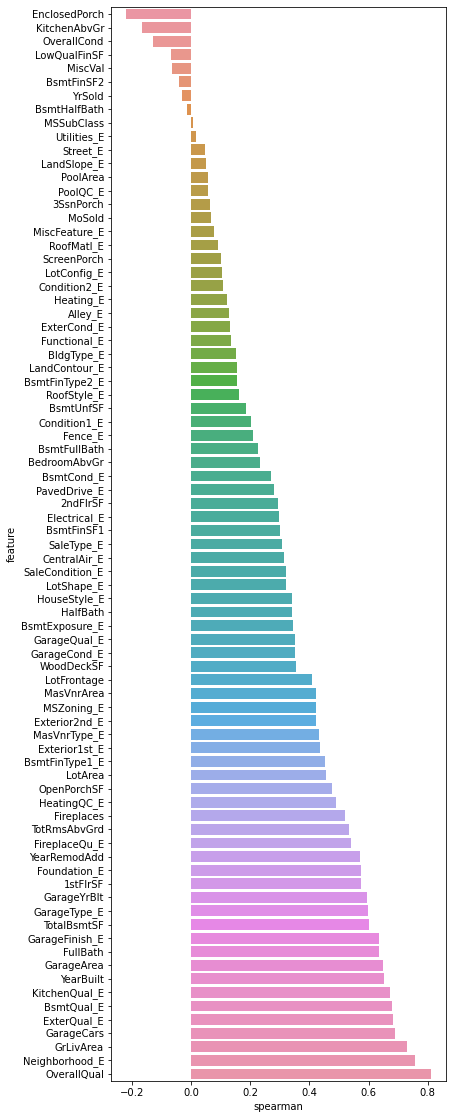

In [49]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative + qual_encoded
spearman(df, features)

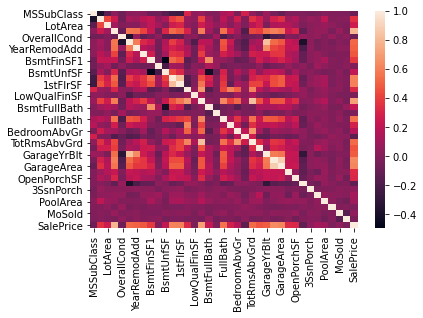

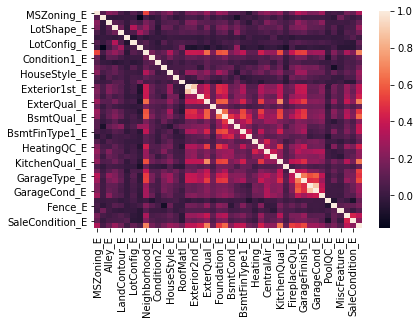

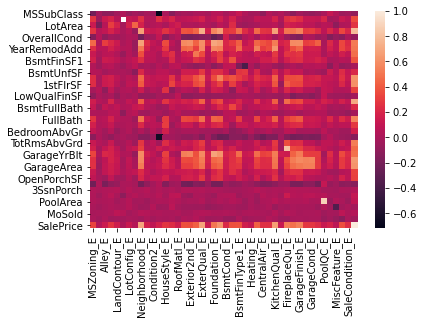

In [51]:
plt.figure(1)
corr = df[quantitative+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = df[qual_encoded+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative)+1, len(qual_encoded)+1]), index=quantitative+['SalePrice'], columns=qual_encoded+['SalePrice'])
for q1 in quantitative+['SalePrice']:
    for q2 in qual_encoded+['SalePrice']:
        corr.loc[q1, q2] = df[q1].corr(df[q2])
sns.heatmap(corr)

In [ ]:
#There are many strong correlations between variables. 
#Garages seem to be built same year as houses, basements have generally same area as 
#first floor which is pretty obvious. 
#Garage area is strongly correlated with number of cars. 
#Neighborhood is correlated with lots of other variables and this confirms the idea that 
#houses in same region share same characteristics. 
#Dwelling type is negatively correlated with kitchen above grade square feet.

In [ ]:
# Pairplots 
# how sale price compares to each independent variable.

/Users/yuenyeelo/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


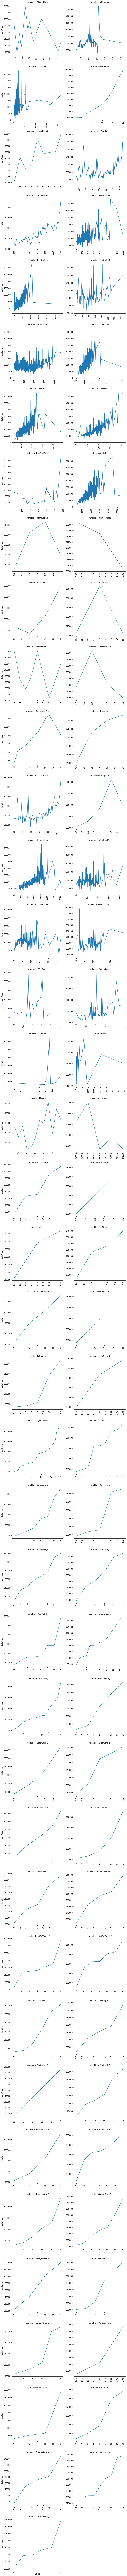

In [52]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(df, id_vars=['SalePrice'], value_vars=quantitative+qual_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")